###  MicroGrad demo

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from mlx_micrograd.engine import Value
from mlx_micrograd.nn import Neuron, Layer, MLP

In [4]:
np.random.seed(1337)
random.seed(1337)

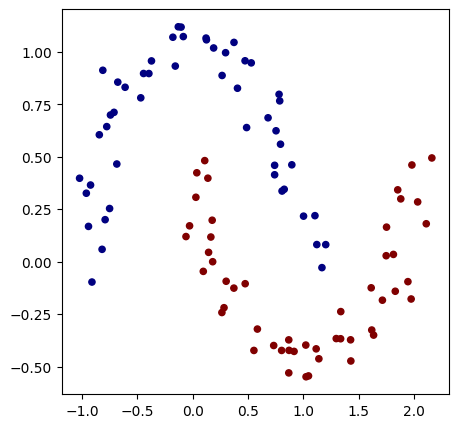

In [5]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [6]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
number of parameters 337


In [7]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()

In [8]:
# optimization
for k in range(20):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        
        p.data = p.data - learning_rate * p.grad.data
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")



step 0 loss array(0.895844, dtype=float32), accuracy 50.0%
step 1 loss array(1.72359, dtype=float32), accuracy 81.0%
step 2 loss array(0.742901, dtype=float32), accuracy 77.0%
step 3 loss array(0.770564, dtype=float32), accuracy 82.0%
step 4 loss array(0.369279, dtype=float32), accuracy 84.0%
step 5 loss array(0.313545, dtype=float32), accuracy 86.0%
step 6 loss array(0.281423, dtype=float32), accuracy 89.0%
step 7 loss array(0.268887, dtype=float32), accuracy 91.0%
step 8 loss array(0.256715, dtype=float32), accuracy 91.0%
step 9 loss array(0.270486, dtype=float32), accuracy 91.0%
step 10 loss array(0.24507, dtype=float32), accuracy 91.0%
step 11 loss array(0.250991, dtype=float32), accuracy 92.0%
step 12 loss array(0.21561, dtype=float32), accuracy 91.0%
step 13 loss array(0.230904, dtype=float32), accuracy 93.0%
step 14 loss array(0.201522, dtype=float32), accuracy 92.0%
step 15 loss array(0.225745, dtype=float32), accuracy 93.0%
step 16 loss array(0.19448, dtype=float32), accuracy 

In [2]:
h = 0.5
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]

# Batch processing
batch_size = 1000  # Adjust this based on your dataset size
Z = np.zeros(xx.shape)
for i in range(0, len(Xmesh), batch_size):
    Xbatch = Xmesh[i:i + batch_size]
    inputs = [list(map(Value, xrow)) for xrow in Xbatch]
    scores = list(map(model, inputs))
    batch_Z = np.array([s.data > 0 for s in scores])
    Z[i:i + batch_size] = batch_Z

# Plot the decision boundary
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

NameError: name 'X' is not defined